# Центральная предельная теорема своими руками

Ну значит попробуем мы доказать, что ЦПТ работает. Делать это будем на примере бета-распределения, оно самое стремное из всех, которые мне попались.
ЦПТ, кстати говорит о том, что чем больше выборка, тем более похожим будет распределение средних этой выборки на нормальное распределение, да еще и с коэффициентами равными матожиданию исходной случайной величины и дисперсии, деленной на объем выборки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

Создаем бета-распределение и запоминаем дисперсию и матожидание. В целом, не сложно посчитать их вручную, но зачем?

In [2]:
a, b = 0.5, 0.6
beta = sts.beta(a, b)
mean, var = beta.stats(moments='mv')
print('EX(beta) = %.02f' % mean, 'DX(beta) = %.02f' % var)

EX(beta) = 0.45 DX(beta) = 0.12


Рисуем гистограмму от выборки объемом 1000 и поверх график плотности распределения нашей случайной величины.

Text(0.5, 0, '$x$')

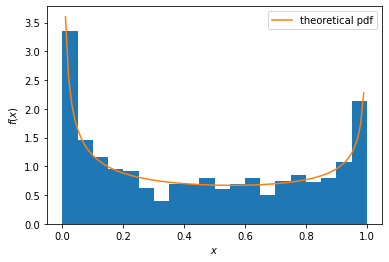

In [3]:
x = np.linspace(0,1,100)
main = beta.rvs(1000)
plt.hist(main, bins=20, density=True)
pdf = beta.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Функция, которая принимает объем выборки и рисует нам гистограммы распределений выборочных средних и плотность соответствующего нормального распределения:


In [4]:

def make_magic(N):
    x = np.linspace(0,1,100)
    mid_val = []
    for i in range(1000):
        mid_val.append(sum(beta.rvs(N))/N)
    
    norm = sts.norm(loc=mean, scale=(var/N)**0.5)
    pdf = norm.pdf(x)
    plt.hist(mid_val, bins=15, density=True)
    plt.plot(x, pdf, label='norm(E, D/N) for N=%s' % N)
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')



Параметры соответствующего нормального распределения в функции выше задаются сразу при создании: 
первый параметр -- матожидание нашего распределения, а второй -- дисперсия деленная на N, согласно Центральной предельной теореме.

Пробегаемся по основным значениям N:

параметры нормального распределения: Norm(0.454545,0.059032)


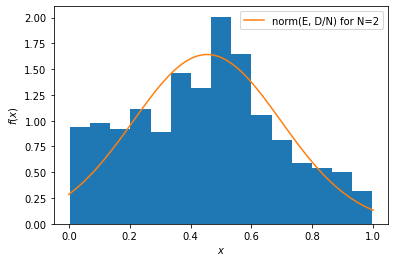

In [5]:
N = 2
print('параметры нормального распределения: Norm(%f,%f)' % (mean, var/N))
make_magic(N)

параметры нормального распределения: Norm(0.454545,0.023613)


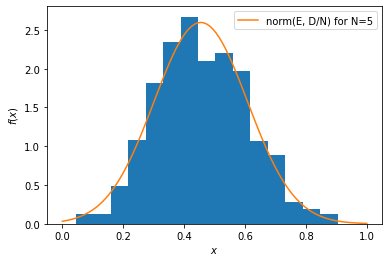

In [6]:
N = 5
print('параметры нормального распределения: Norm(%f,%f)' % (mean, var/N))
make_magic(N)

параметры нормального распределения: Norm(0.454545,0.011806)


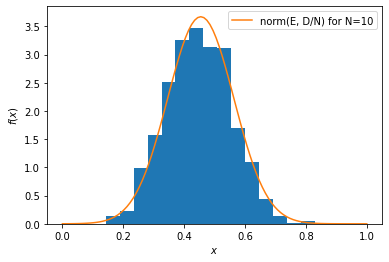

In [7]:
N = 10
print('параметры нормального распределения: Norm(%f,%f)' % (mean, var/N))
make_magic(N)

параметры нормального распределения: Norm(0.454545,0.002361)


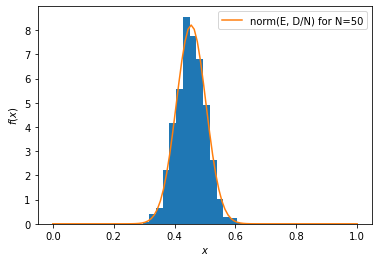

In [8]:
N = 50
print('параметры нормального распределения: Norm(%f,%f)' % (mean, var/N))
make_magic(N)

## Вывод

На данном бета-распределении ЦПТ отлично показала себя. В целом, можно поиграться еще с начальными значениями для распределения, но, на мой взгляд, эти были наиболее интересными.